In [1]:
import yfinance as yf
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('../data/CSPX_cleaned.csv', parse_dates=['Date'])
df.head(10)

,Unnamed: 0,Date,Close,High,Low,Open,Volume
0,0,2019-01-02,244.899994,245.589996,240.009995,242.179993,58019.0
1,1,2019-01-03,241.300003,243.720001,239.429993,241.880005,287542.0
2,2,2019-01-04,246.139999,246.800003,241.500000,241.759995,86487.0
3,3,2019-01-07,249.259995,249.509995,246.800003,248.320007,497565.0
4,4,2019-01-08,249.479996,252.320007,249.259995,249.720001,123117.0
5,5,2019-01-09,252.899994,253.250000,251.699997,251.979996,79492.0
6,6,2019-01-10,253.070007,253.070007,250.470001,251.720001,42799.0
7,7,2019-01-11,253.240005,254.080002,252.199997,253.710007,77772.0
8,8,2019-01-14,252.710007,253.009995,251.259995,251.639999,88689.0
9,9,2019-01-15,254.419998,255.000000,252.570007,253.800003,150342.0


In [3]:
df.columns

Index(['Unnamed: 0', 'Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [3]:
df = df[['Date', 'Close', 'High', 'Low', 'Open', 'Volume']]
df.head(10)

,Date,Close,High,Low,Open,Volume
0,2019-01-02,244.899994,245.589996,240.009995,242.179993,58019.0
1,2019-01-03,241.300003,243.720001,239.429993,241.880005,287542.0
2,2019-01-04,246.139999,246.800003,241.500000,241.759995,86487.0
3,2019-01-07,249.259995,249.509995,246.800003,248.320007,497565.0
4,2019-01-08,249.479996,252.320007,249.259995,249.720001,123117.0
5,2019-01-09,252.899994,253.250000,251.699997,251.979996,79492.0
6,2019-01-10,253.070007,253.070007,250.470001,251.720001,42799.0
7,2019-01-11,253.240005,254.080002,252.199997,253.710007,77772.0
8,2019-01-14,252.710007,253.009995,251.259995,251.639999,88689.0
9,2019-01-15,254.419998,255.000000,252.570007,253.800003,150342.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1514 non-null   datetime64[ns]
 1   Close   1514 non-null   float64       
 2   High    1514 non-null   float64       
 3   Low     1514 non-null   float64       
 4   Open    1514 non-null   float64       
 5   Volume  1514 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 71.1 KB


In [5]:
df.describe()

,Date,Close,High,Low,Open,Volume
count,1514,1514.000000,1514.000000,1514.000000,1514.000000,1.514000e+03
mean,2021-12-29 21:05:56.671069952,413.732979,420.309797,410.803050,413.651769,1.120957e+05
min,2019-01-02 00:00:00,223.149994,238.139999,1.000000,230.000000,1.287700e+04
25%,2020-07-01 06:00:00,327.320007,328.569992,325.397491,327.297508,5.836250e+04
50%,2021-12-26 12:00:00,418.745010,421.225006,415.815002,419.145004,8.374200e+04
75%,2023-07-03 18:00:00,466.639992,468.342514,463.820007,466.160004,1.302465e+05
max,2024-12-30 00:00:00,645.669983,773.119995,644.390015,646.000000,1.154579e+06
std,NaN,97.059965,106.417333,97.880726,97.056701,9.588744e+04


# plot closing price over time
# 📌 why ? 
- Spot trends, seasonality, or sudden drops/spikes.
- The closing price is considered the most reliable price of the day because it reflects the final consensus between buyers and sellers.
- It’s the most widely used benchmark for performance analysis, financial reports, and indexes.

# 📌 Logic for your model:
- Serves as the main target variable when predicting stock prices.
- Other features (volume, returns, moving averages) are often derived from it.

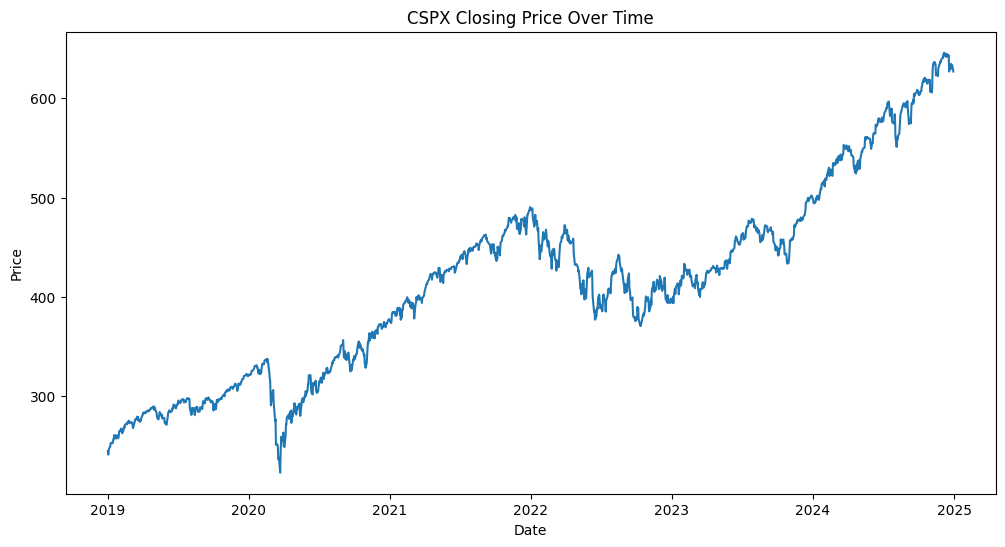

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'])
plt.title('CSPX Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# plot volume over time
# why? 
- Volume spikes often indicate market events 
- Can be used as a feature in the model

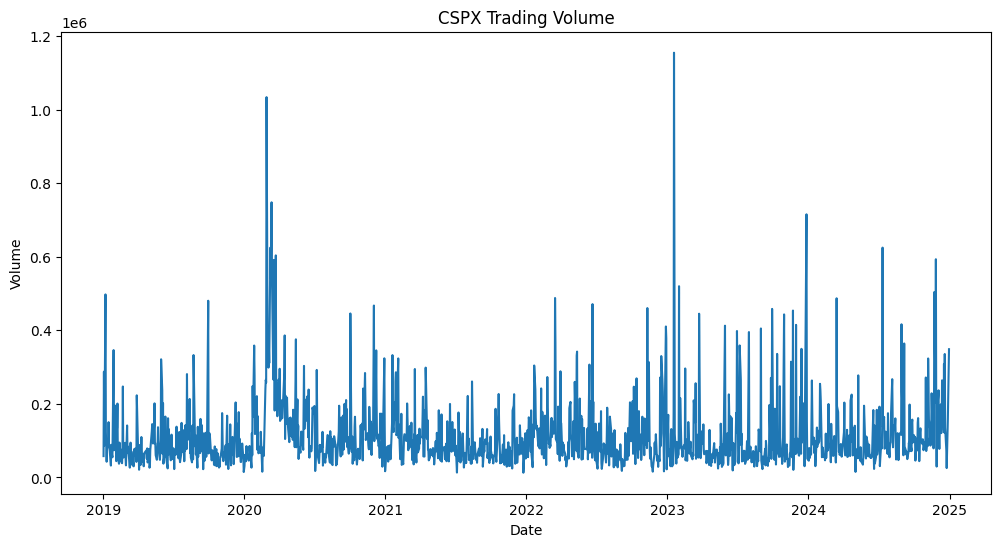

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Volume'])
plt.title('CSPX Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

# Plot Moving Averages
# 📌 why?
- Moving averages smooth out short-term fluctuations.
- Helps identify trends or support/resistance levels.
- Moving averages (like 5-day, 20-day, 50-day) smooth out noise and highlight trends.
- Traders use them to detect bullish/bearish signals (e.g., "golden cross" = MA50 > MA200).

# 📌 Logic for your model:
- They help capture trend information that raw closing prices might not show.
- Reduce volatility → model learns more about underlying patterns instead of random fluctuations.
- Serve as engineered features for training (extra input columns).

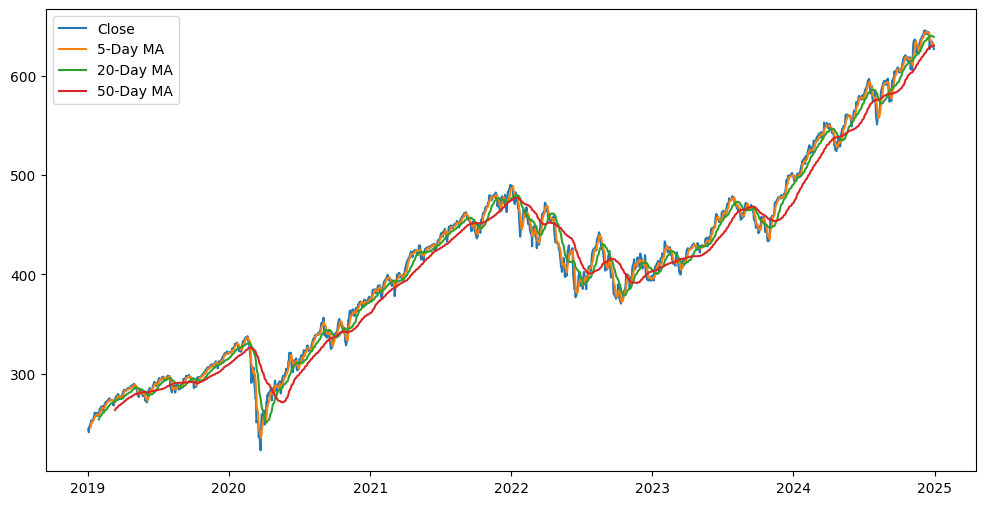

In [11]:
df['MA5'] = df['Close'].rolling(5).mean()
df['MA20'] = df['Close'].rolling(20).mean()
df['MA50'] = df['Close'].rolling(50).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['MA5'], label='5-Day MA')
plt.plot(df['Date'], df['MA20'], label='20-Day MA')
plt.plot(df['Date'], df['MA50'], label='50-Day MA')
plt.legend()
plt.show()

# Daily Returns

# 📌 Reason:
- Return = % change in price from day to day.
- Captures volatility and relative price movement (instead of raw prices).
- Used in risk/portfolio analysis.

# 📌 Logic for your model:
- Models trained on returns instead of absolute prices often perform better because:
- They are stationary (don’t grow indefinitely like prices).
- Easier to model short-term dependencies.
- Returns can also serve as labels if you’re predicting direction (up/down) instead of raw price.

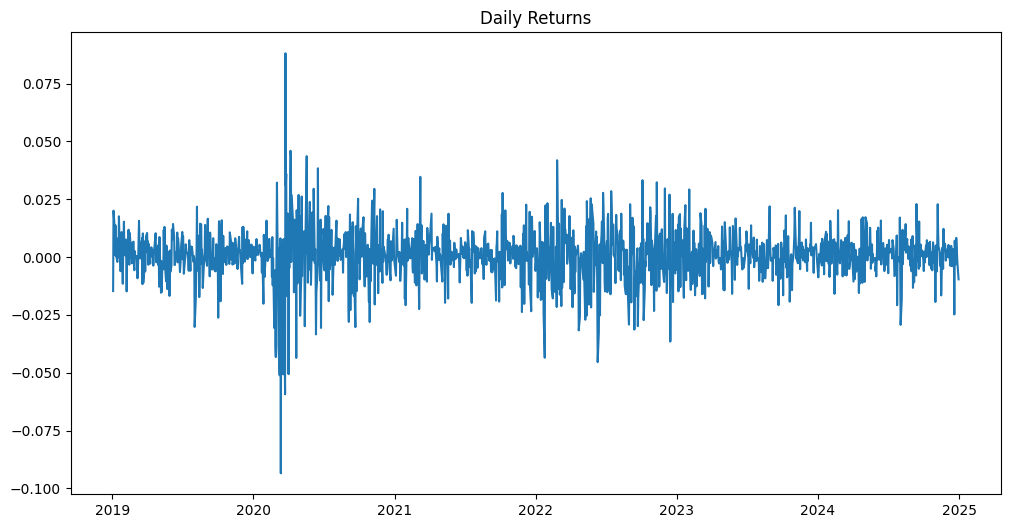

In [9]:
df['Return'] = df['Close'].pct_change()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Return'])
plt.title('Daily Returns')
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1514 non-null   datetime64[ns]
 1   Close   1514 non-null   float64       
 2   High    1514 non-null   float64       
 3   Low     1514 non-null   float64       
 4   Open    1514 non-null   float64       
 5   Volume  1514 non-null   float64       
 6   MA5     1510 non-null   float64       
 7   MA20    1495 non-null   float64       
 8   Return  1513 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 106.6 KB


# Rolling Standard Deviation (Volatility)
- Measures how much daily returns fluctuate — a proxy for market risk.

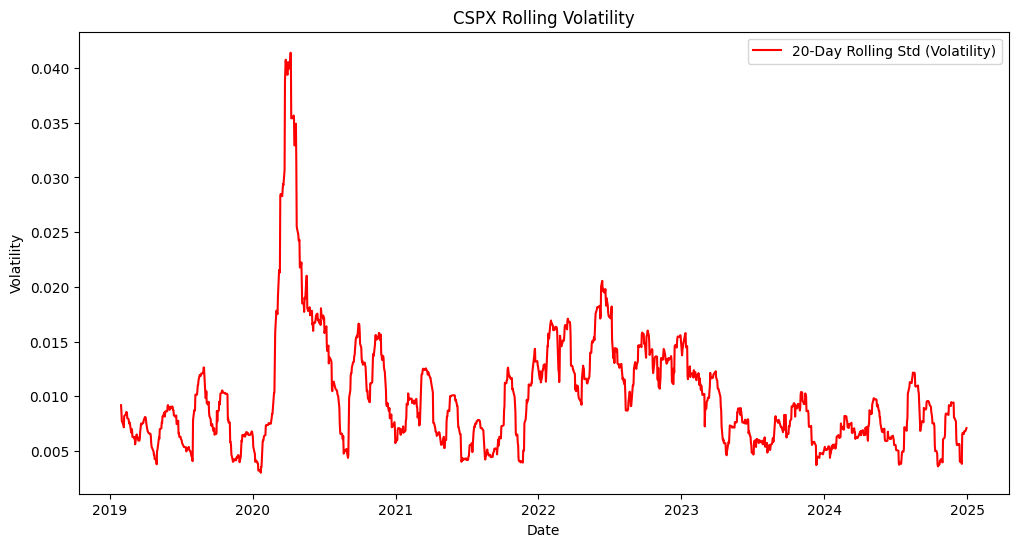

In [12]:
# Rolling 20-day standard deviation (like 1 trading month)
df['Volatility20'] = df['Return'].rolling(window=20).std()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Volatility20'], label='20-Day Rolling Std (Volatility)', color='red')
plt.title('CSPX Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Extract Year, Month, Day
- Adds seasonality and time patterns as categorical/numeric features.

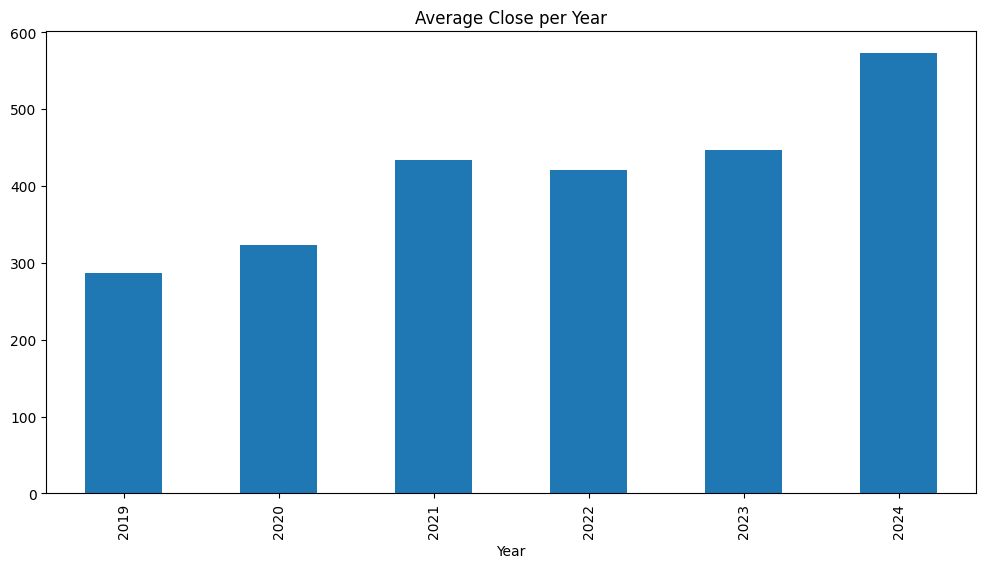

In [13]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.groupby('Year')['Close'].mean().plot(kind='bar', figsize=(12,6), title="Average Close per Year")
plt.show()

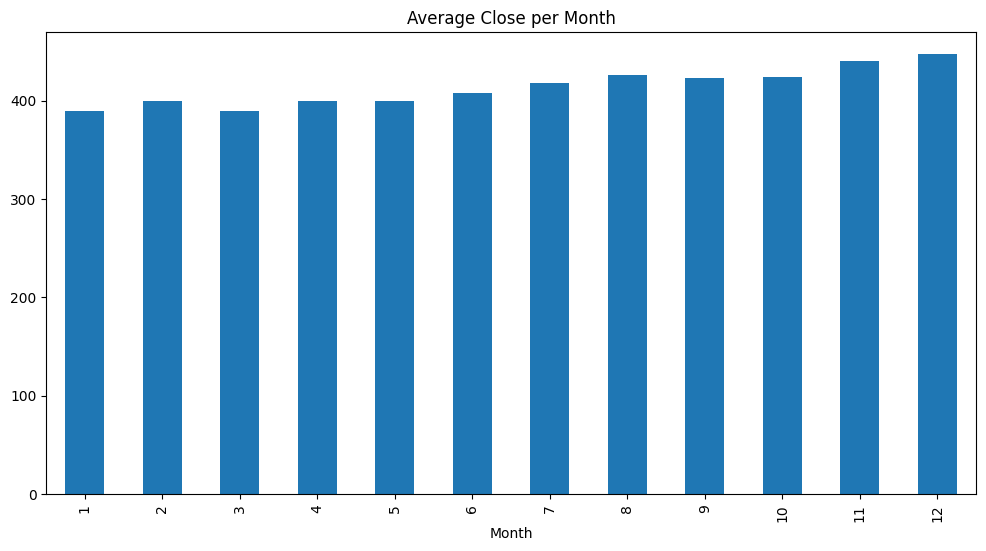

In [14]:
df.groupby('Month')['Close'].mean().plot(kind='bar', figsize=(12,6), title="Average Close per Month")
plt.show()

# Lag Features
- Capture memory of past prices — essential for time-series models like LSTM or even ML regression.

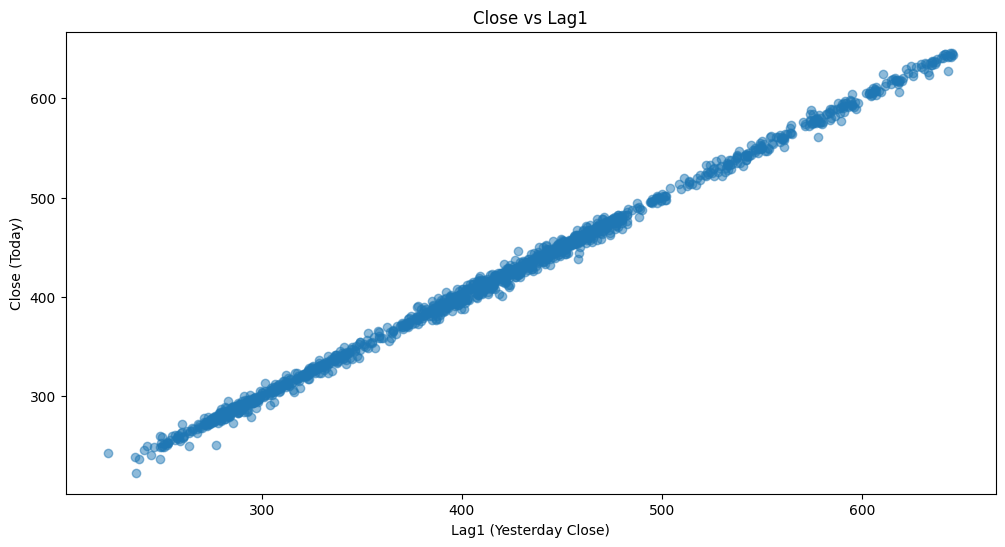

In [16]:
df['Lag1'] = df['Close'].shift(1)
df['Lag2'] = df['Close'].shift(2)
df['Lag3'] = df['Close'].shift(3)

plt.figure(figsize=(12,6))
plt.scatter(df['Lag1'], df['Close'], alpha=0.5)
plt.title('Close vs Lag1')
plt.xlabel('Lag1 (Yesterday Close)')
plt.ylabel('Close (Today)')
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1514 non-null   datetime64[ns]
 1   Close         1514 non-null   float64       
 2   High          1514 non-null   float64       
 3   Low           1514 non-null   float64       
 4   Open          1514 non-null   float64       
 5   Volume        1514 non-null   float64       
 6   MA5           1510 non-null   float64       
 7   MA20          1495 non-null   float64       
 8   Return        1513 non-null   float64       
 9   MA50          1465 non-null   float64       
 10  Volatility20  1494 non-null   float64       
 11  Year          1514 non-null   int32         
 12  Month         1514 non-null   int32         
 13  Day           1514 non-null   int32         
 14  Lag1          1513 non-null   float64       
 15  Lag2          1512 non-null   float64 

In [18]:
df = df.dropna().reset_index(drop=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1465 non-null   datetime64[ns]
 1   Close         1465 non-null   float64       
 2   High          1465 non-null   float64       
 3   Low           1465 non-null   float64       
 4   Open          1465 non-null   float64       
 5   Volume        1465 non-null   float64       
 6   MA5           1465 non-null   float64       
 7   MA20          1465 non-null   float64       
 8   Return        1465 non-null   float64       
 9   MA50          1465 non-null   float64       
 10  Volatility20  1465 non-null   float64       
 11  Year          1465 non-null   int32         
 12  Month         1465 non-null   int32         
 13  Day           1465 non-null   int32         
 14  Lag1          1465 non-null   float64       
 15  Lag2          1465 non-null   float64 

In [22]:
df.head(10)

,Date,Close,High,Low,Open,Volume,MA5,MA20,Return,MA50,Volatility20,Year,Month,Day,Lag1,Lag2,Lag3
0,2019-03-12,274.179993,274.540009,272.829987,273.839996,60269.0,271.404004,272.340501,0.007163,263.605200,0.006188,2019,3,12,272.230011,268.029999,270.040009
1,2019-03-13,276.070007,276.500000,273.779999,273.790009,94606.0,272.110004,272.678001,0.006893,264.228600,0.006306,2019,3,13,274.179993,272.230011,268.029999
2,2019-03-14,275.899994,276.760010,275.190002,276.200012,41365.0,273.282001,273.051001,-0.000616,264.920600,0.006234,2019,3,14,276.070007,274.179993,272.230011
3,2019-03-15,277.480011,277.640015,275.829987,276.089996,70838.0,275.172003,273.363002,0.005727,265.547400,0.005957,2019,3,15,275.899994,276.070007,274.179993
4,2019-03-18,277.279999,278.309998,277.119995,277.320007,33259.0,276.182001,273.619502,-0.000721,266.107800,0.005948,2019,3,18,277.480011,275.899994,276.070007
5,2019-03-19,279.559998,279.929993,278.500000,278.500000,44673.0,277.258002,273.992502,0.008223,266.709400,0.006157,2019,3,19,277.279999,277.480011,275.899994
6,2019-03-20,276.290009,278.399994,276.290009,278.140015,35533.0,277.302002,274.170502,-0.011697,267.177201,0.006806,2019,3,20,279.559998,277.279999,277.480011
7,2019-03-21,279.119995,279.880005,275.820007,276.010010,30320.0,277.946002,274.526501,0.010243,267.698200,0.007080,2019,3,21,276.290009,279.559998,277.279999
8,2019-03-22,275.989990,280.500000,275.350006,280.459991,76468.0,277.647998,274.641000,-0.011214,268.153200,0.007503,2019,3,22,279.119995,276.290009,279.559998
9,2019-03-25,274.579987,275.769989,273.619995,274.250000,78467.0,277.107996,274.594000,-0.005109,268.590600,0.007452,2019,3,25,275.989990,279.119995,276.290009


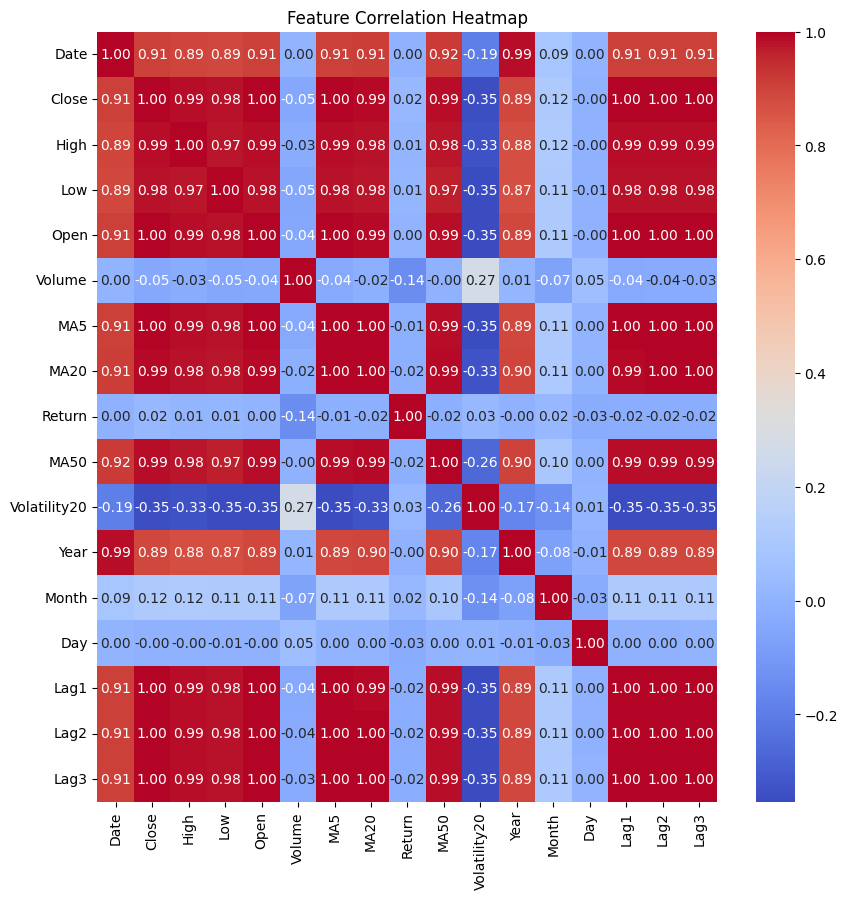

In [26]:
plt.figure(figsize=(10,10))  # use plt.figure, not plt.fig
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()